In [352]:
import pandas as pd
import numpy as np
data = pd.read_csv('./agaricus-lepiota.csv')
X = data.drop("edibility", 1)
#X = np.array(X)

# Class
y = data.edibility
print(X.shape)
print(y)

(8124, 22)
0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: edibility, Length: 8124, dtype: object


In [353]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = pd.get_dummies(X)
print(X.shape)

skb = SelectKBest(chi2, k=3)
print(data.shape)
skb.fit(X,y)
X_new = skb.transform(X)

print(X_new.shape)
np.array(X.columns)[skb.get_support(indices=True)]

(8124, 117)
(8124, 23)
(8124, 3)


array(['odor_f', 'odor_n', 'stalk-surface-above-ring_k'], dtype=object)

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

Original space: (8124, 117)
PCA space: (8124, 3)
[-2.92388739e-02 -3.70715915e-06 -5.11907122e-03  7.91345987e-02
 -1.26724309e-03 -4.35057033e-02 -7.03588099e-02 -2.39739001e-04
  4.02172626e-02  3.03812862e-02 -8.09120728e-03  8.96705275e-04
  6.14899183e-02 -3.64543173e-02  3.44653152e-02 -6.06064705e-03
  3.62190867e-04  3.62190867e-04 -5.77040808e-02  1.07339319e-02
  2.80686987e-01 -2.80686987e-01 -3.52540455e-02 -7.53791458e-03
  1.47971274e-01 -3.52540455e-02  1.50806697e-03 -2.07009037e-01
 -1.57277882e-02  7.56517446e-02  7.56517446e-02 -1.45601230e-03
  1.45601230e-03  3.63169881e-02 -3.63169881e-02 -2.02078484e-01
  2.02078484e-01  2.29632711e-01 -1.55336961e-03  1.11800268e-02
  1.89599246e-02 -2.29453643e-02 -7.64946769e-02 -6.33531192e-04
 -3.98236813e-02 -2.09092330e-03 -4.27591943e-02 -7.38833971e-02
  4.11476006e-04 -1.73884151e-02  1.73884151e-02  2.23791910e-01
 -1.17515598e-01 -4.73266848e-02 -4.39645530e-02 -1.49850740e-02
 -1.56201906e-02  2.15801446e-01 -2.00536

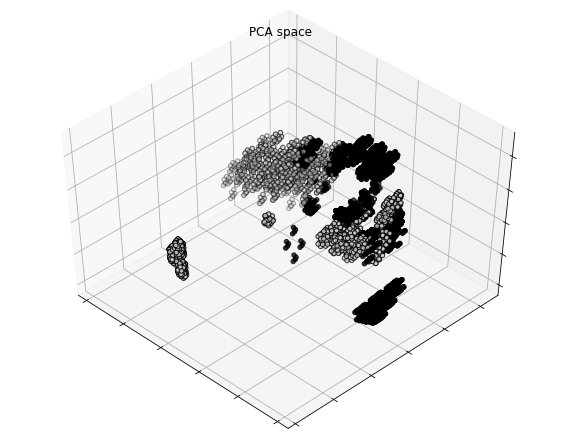

In [354]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

#np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

print("Original space:", X.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

print("PCA space:", Xpca.shape)
#########################
# Plot PCA
#########################
fig = plt.figure(2, figsize=(8, 6))
plt.clf()
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=135)

plt.cla()
y = y.replace(to_replace=['e', 'p'], value=[0,5])
print(pca.components_[0])
ax2.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_title("PCA space")
import heapq
print(heapq.nlargest(1, range(len(pca.components_[0])),abs(pca.components_[0]).take))
print(heapq.nlargest(1, range(len(pca.components_[1])),abs(pca.components_[1]).take))
print(heapq.nlargest(1, range(len(pca.components_[2])),abs(pca.components_[2]).take))
print("RESULT", X.columns[96], X.columns[94], X.columns[110])
plt.draw()
plt.show()

y = data.edibility

(8124, 117)
0       5
1       0
2       0
3       5
4       0
       ..
8119    0
8120    0
8121    0
8122    5
8123    0
Name: edibility, Length: 8124, dtype: int64
Original features (pixel index):  [6, 47, 71]


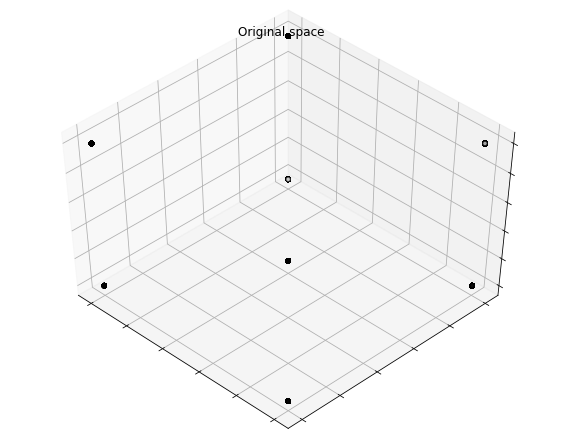

In [355]:
#########################
# Plot originals (this will be mostly meaningless)
#########################
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=135)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)

print(X.shape)
y = y.replace(to_replace=['e', 'p'], value=[0,5])
print(y)
X = np.array(X)

# Vis some rando features
f = sorted(np.random.permutation(117)[1:4])
print("Original features (pixel index): ",f)

ax.scatter(X[:, f[0]], X[:, f[1]], X[:, f[2]], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title("Original space")

plt.draw()
plt.show()

Ut i fra verdiene fra feature selection så fekk vi odor_f, odor_n og stalk-surface-above-ring_k,
men i PCA fekk vi spore-print-color_h ring-type_p habitat_d